# LBM: Demo Extraction

Using the mbo [scanreader](millerbrainobservatory.github.io/scanreader/index.html), we can extract and tile our images with some optional trimming. 

In [1]:
import sys
from pathlib import Path
import numpy as np

sys.path.append('../../util/')  # TODO: Take this out when we upload to pypi
sys.path.append('../..')  # TODO: Take this out when we upload to pypi
import matplotlib.pyplot as plt

%matplotlib inline

## System and User Information

In [3]:
!pip install cloudmesh-cmd5
!cms help # dont forget to call it after the install as it sets some defaults
!cms sysinfo

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 112.5/112.5 kB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.1 kB ? eta -:--:--
   ---------------------------------------- 78.1/78.1 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 127.0/127.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 67.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/240.7 kB ? eta -:--:--
   -------------------------------

## Set up filepaths

In [5]:
# ScanReader object holds our image data with tifffile
import scanreader as sr
raw_files = [str(x) for x in Path("C:/Users/RBO/Documents/data/high_res/").glob("*.tif*")]
raw_files

['C:\\Users\\RBO\\Documents\\data\\high_res\\MH70_0p6mm_FOV_50_550um_depth_som_stim_199mW_3min_M1_00001_00001.tif']

## scanreader 

In [17]:
reader = sr.read_scan(raw_files[0], join_contiguous=True, lbm=True, x_cut=(6,6), y_cut=(17,0))
reader.num_channels

30

In [38]:
p = reader[0,:,:,0,:]

In [44]:
p = np.transpose(p, (2,0,1))

In [45]:
p.shape

(1730, 528, 583)

In [32]:
def plot_mean_images(reader):
    fig, ax = plt.subplots(5, 5, figsize=(15, 15))
    ax = ax.flatten()

    for idx in range(min(25, reader.num_channels)):
        b = np.transpose(, (2, 3, 0, 1))
        plane = reader[0,:,:,idx,:].transpose()
        mean_image = np.mean(plane, axis=2)
        ax[idx].imshow(mean_image, cmap='gray')
        ax[idx].axis('off')

    plt.tight_layout()
    plt.show()


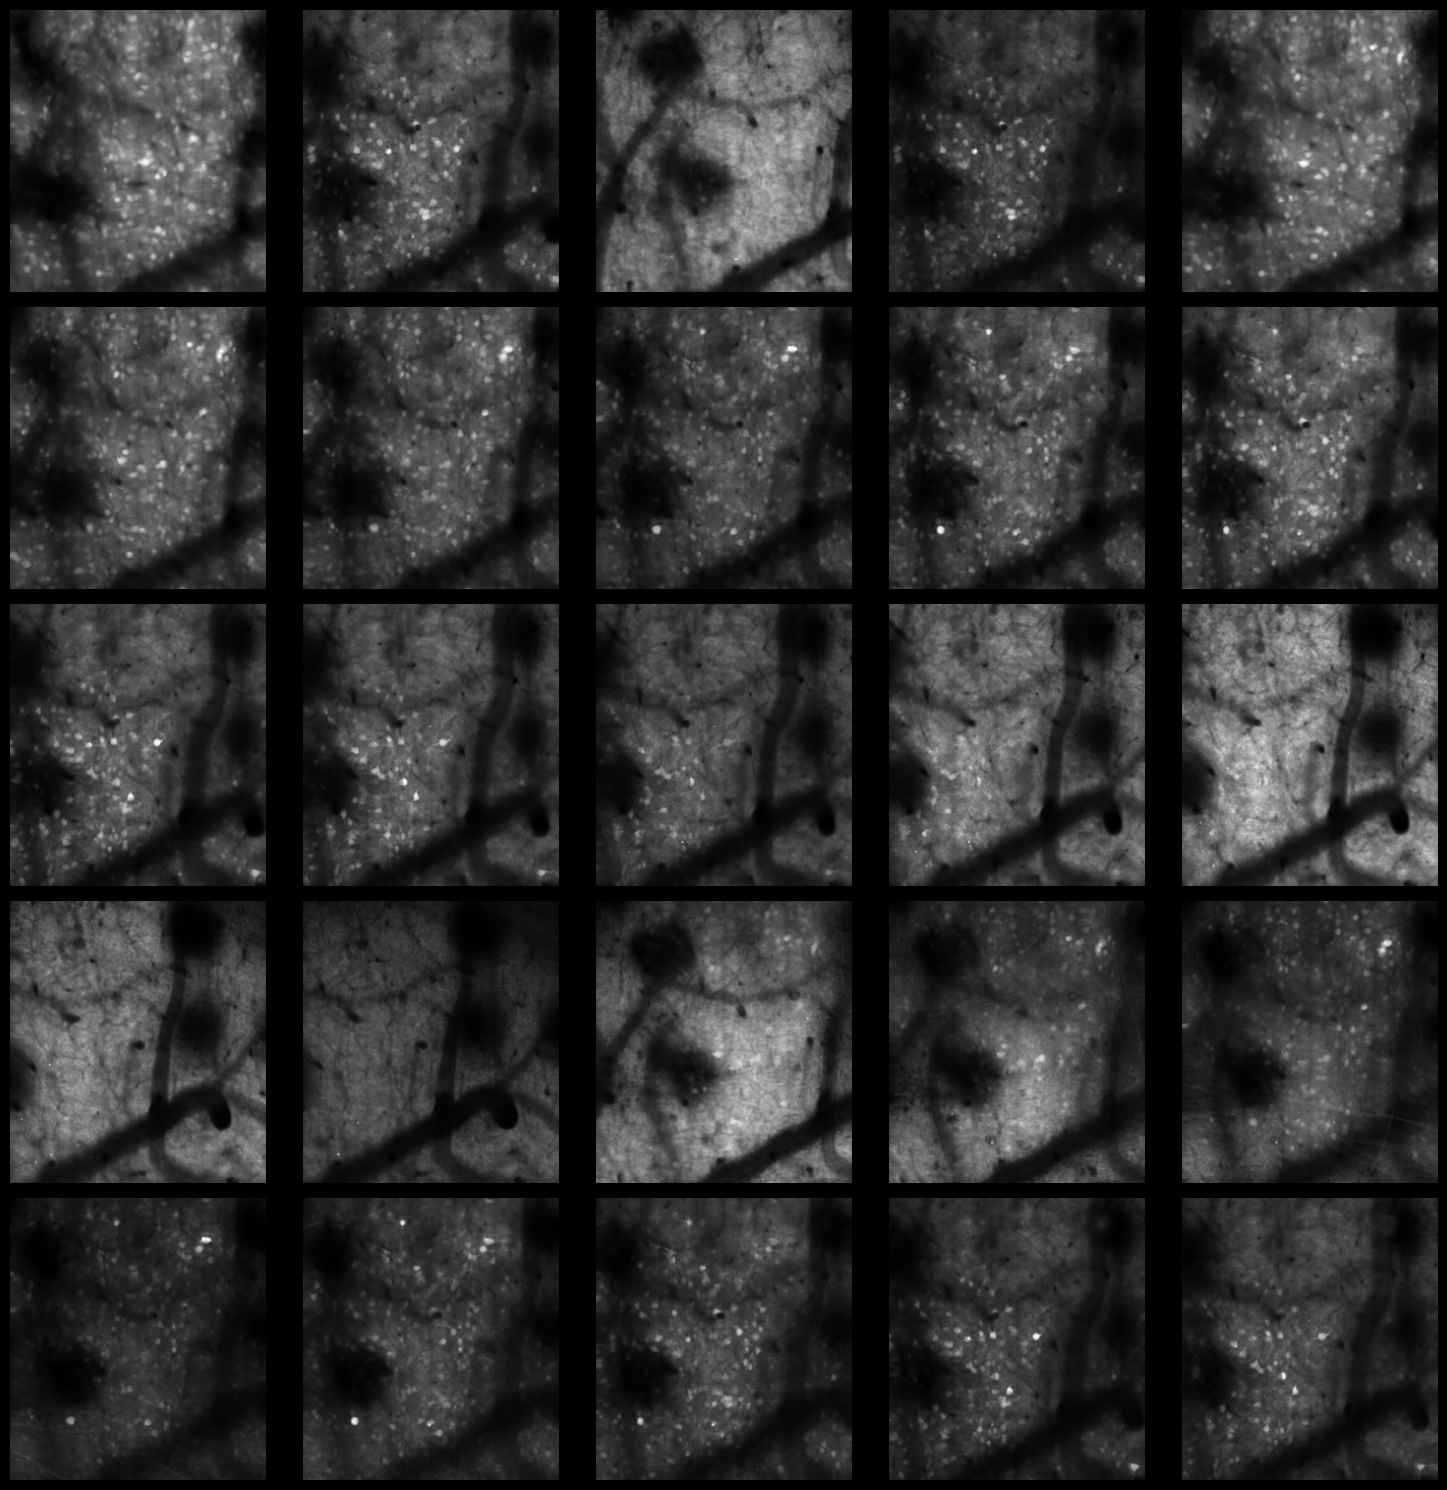

In [33]:
plot_mean_images(reader)

In [ ]:
plot_mean_images(reader)

## Write 3D timeseries to `.tiff`

In [46]:
import tifffile

for idx, num in enumerate(range(1,reader.num_channels+1)):
    if idx == 2:
        path_str = f"{extracted_path}/plane_{num}"
        path_str.mkdir(exist_ok=True)
        # field, X, Y, Z, T
        plane = reader[1, :, :, idx, :].squeeze()
        plane = np.reshape(plane, (plane.shape[-1], plane.shape[0], plane.shape[1]))
        for frame in plane:
            tifffile.imwrite(f"{path_str}", plane, bigtiff=True, metadata={'axes': 'TYX', 'fps': reader.fps})
        
# test = tifffile.imread(extracted_path / "plane_1.tif")

AttributeError: 'str' object has no attribute 'mkdir'